# A304_SRO_NGO_Hall_50K_p1T_to_n1T

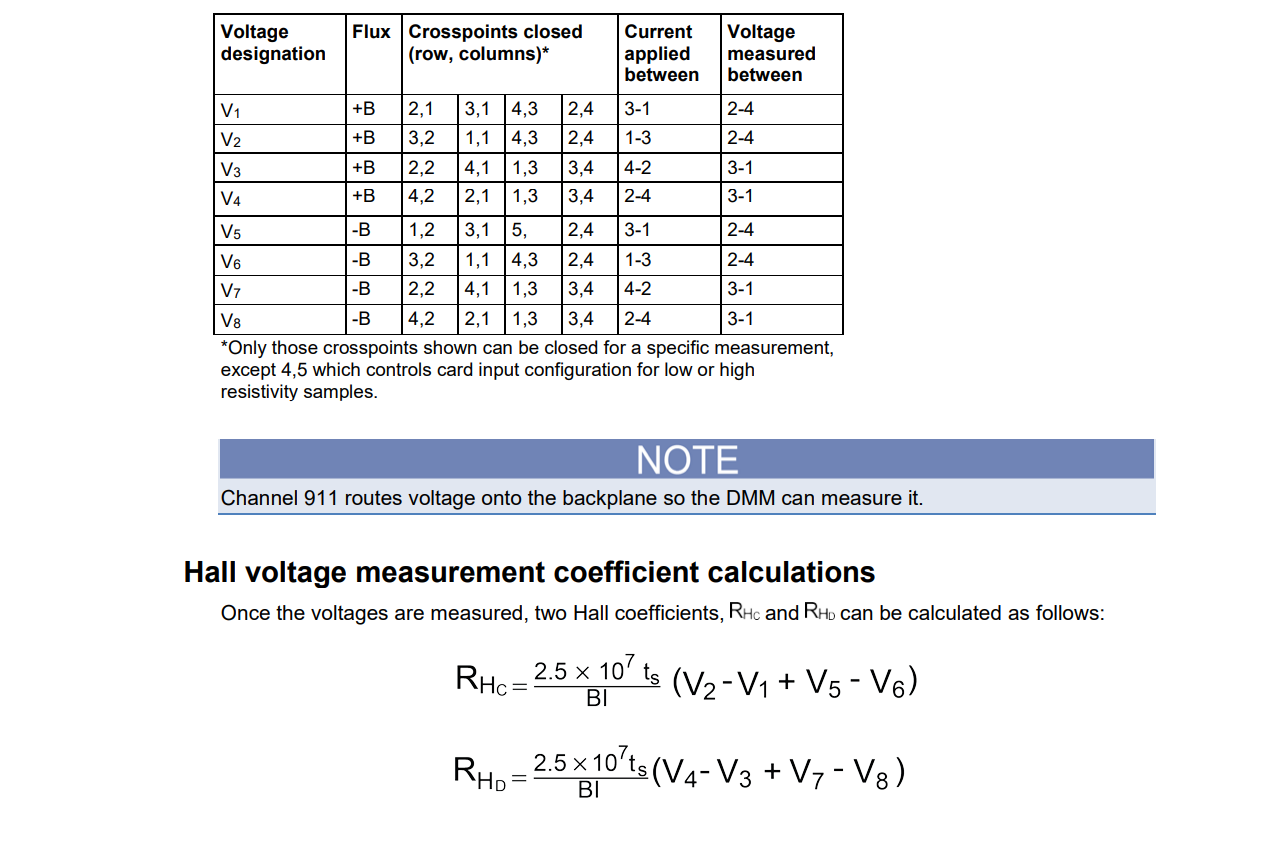

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [42]:
filename='C:\\Users\\Admin\\Desktop\\Data\\6_june_2023\\A304_SRO_NGO_Hall_50K_p1T_n1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,-0.034288,50.027942,274.847735,-274.796949,-227.202110,227.263491,5.208000e-07,1000000
1,0.001,500.345901,49.997084,273.066789,-273.011914,-229.354320,229.417929,5.410000e-07,1000000
2,0.001,1000.574265,50.000117,270.131470,-270.071159,-232.591322,232.646763,5.336000e-07,1000000
3,0.001,1500.519263,50.000130,266.006119,-265.932779,-236.975970,237.084660,5.289000e-07,1000000
4,0.001,2000.437476,49.999898,260.186917,-260.046691,-242.907120,243.019607,5.398000e-07,1000000
...,...,...,...,...,...,...,...,...,...
78,0.001,6000.229688,50.000485,177.996897,-177.488261,-313.158342,313.368346,4.225000e-07,1000000
79,0.001,7000.444702,50.000072,161.892064,-161.788024,-324.746756,324.831359,4.202000e-07,1000000
80,0.001,8000.299683,50.000102,157.406533,-157.370664,-326.758438,326.805949,4.255000e-07,1000000
81,0.001,9000.445361,50.000185,155.029594,-155.026773,-327.094858,327.143381,4.035000e-07,1000000


### Converting B to integer B

In [43]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [44]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,-0.034288,0,50.027942,274.847735,-274.796949,-227.202110,227.263491,5.208000e-07,1000000
1,0.001,500.345901,500,49.997084,273.066789,-273.011914,-229.354320,229.417929,5.410000e-07,1000000
2,0.001,1000.574265,1000,50.000117,270.131470,-270.071159,-232.591322,232.646763,5.336000e-07,1000000
3,0.001,1500.519263,1500,50.000130,266.006119,-265.932779,-236.975970,237.084660,5.289000e-07,1000000
4,0.001,2000.437476,2000,49.999898,260.186917,-260.046691,-242.907120,243.019607,5.398000e-07,1000000


In [45]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

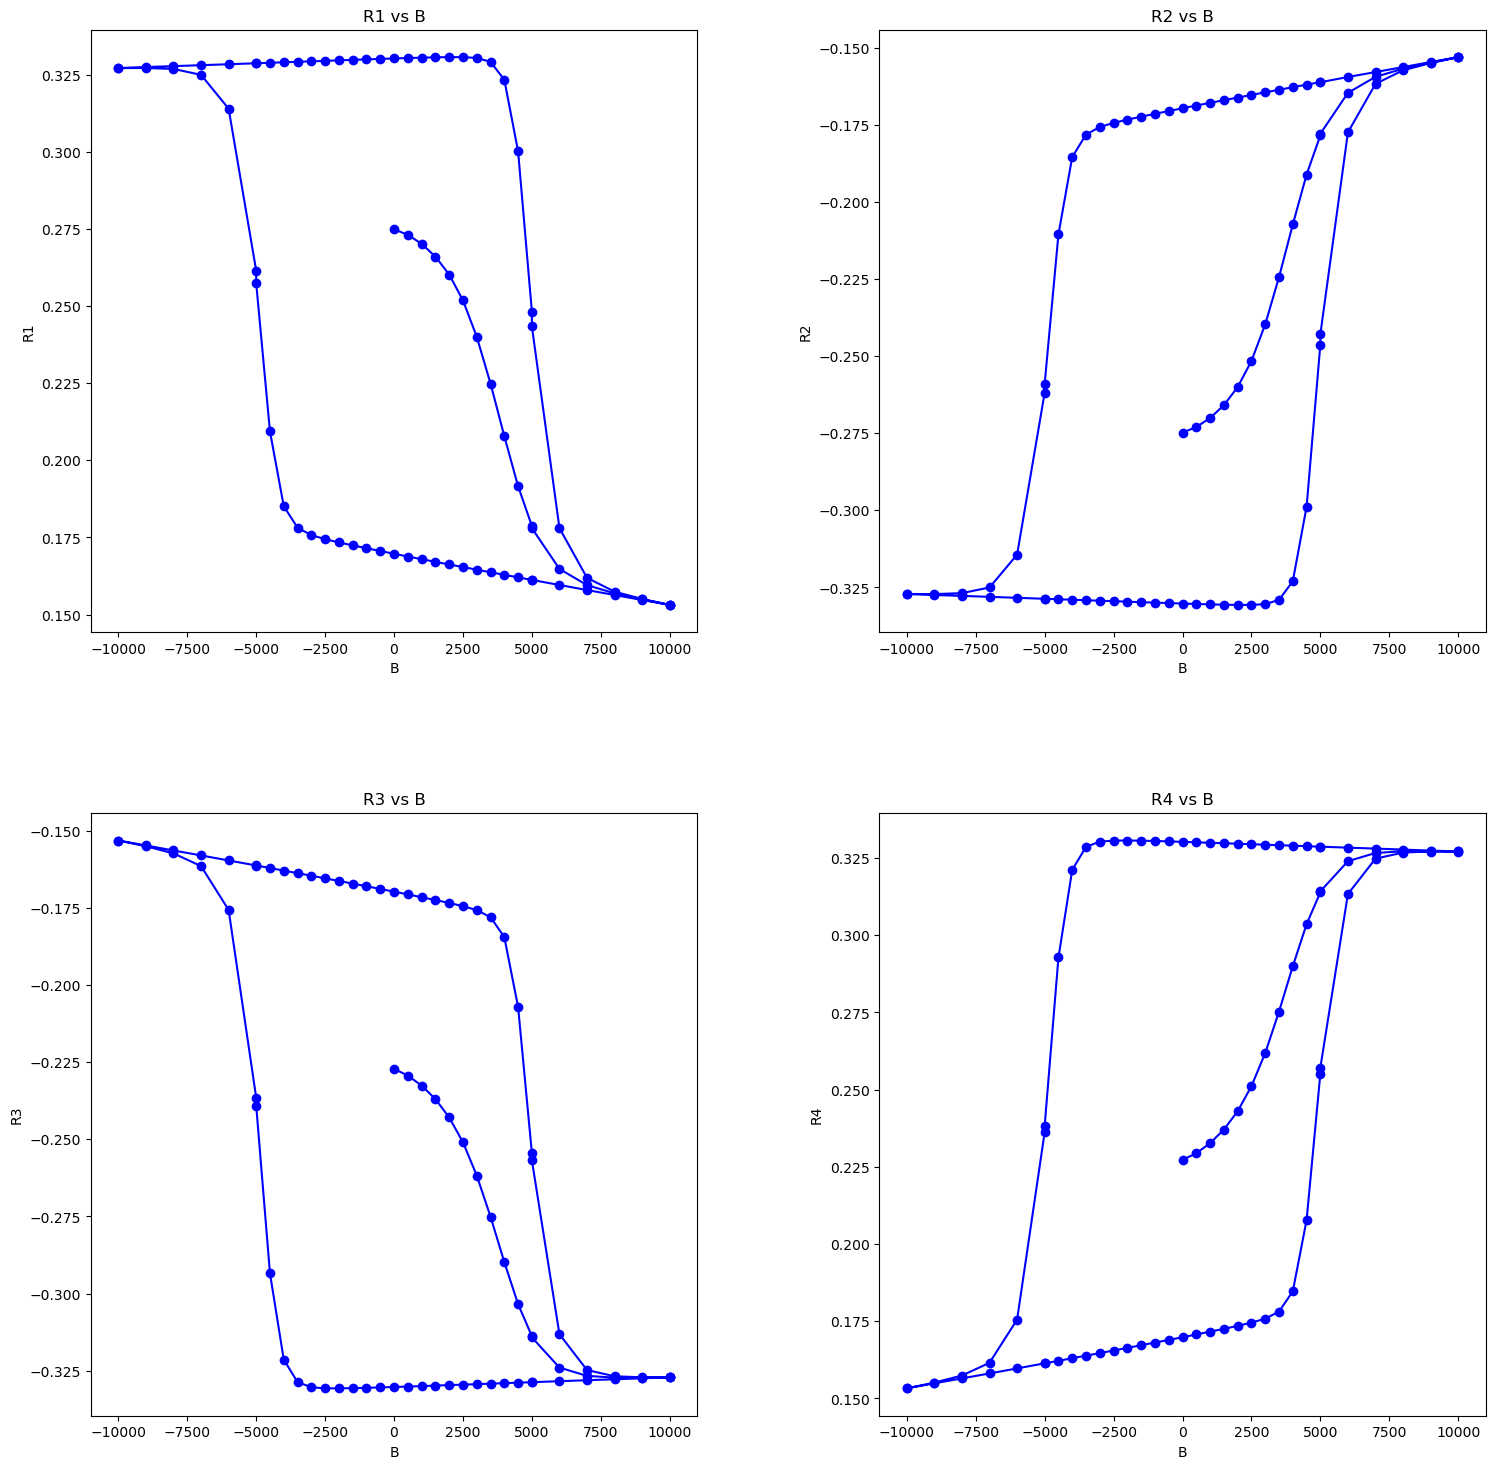

In [46]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [47]:
B_max = max(df['B_int'])
B_max_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_max:
        B_max_first_idx = i
        break
B_max_first_idx

16

In [48]:
df = df.iloc[B_max_first_idx+1:].copy()
df.reset_index(inplace = True, drop = True) # resetting index

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [49]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [50]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [51]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [52]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.357813,10000,49.999701,153.107685,-153.110264,-327.106925,327.162127,4.805000e-07,1000000
1,0.001,9000.601660,9000,49.999872,154.709596,-154.711619,-327.419915,327.441751,4.796000e-07,1000000
2,0.001,8000.454126,8000,50.000109,156.324523,-156.340238,-327.725752,327.766401,4.816000e-07,1000000
3,0.001,7000.559961,7000,50.000034,157.941410,-157.942072,-328.038000,328.089662,4.682000e-07,1000000
4,0.001,6000.206885,6000,50.000180,159.576543,-159.560532,-328.354769,328.387166,4.641000e-07,1000000


In [53]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.286182,-10000,50.000098,327.116397,-327.104600,-153.218400,153.261276,4.747000e-07,1000000
34,0.001,-9000.585889,-9000,50.000410,327.443159,-327.439141,-154.818423,154.875113,4.690000e-07,1000000
35,0.001,-8000.413330,-8000,49.999793,327.729795,-327.726251,-156.444900,156.486155,4.506000e-07,1000000
36,0.001,-7000.556641,-7000,50.000283,328.041294,-328.029528,-158.050007,158.073897,4.684000e-07,1000000
37,0.001,-6000.388892,-6000,50.000147,328.344936,-328.346499,-159.684181,159.714215,4.490000e-07,1000000


In [54]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [55]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,49.999701,153.107685,-153.110264,-327.106925,327.162127,327.116397,-327.104600,-153.218400,153.261276,1000000
1,0.001,9000,49.999872,154.709596,-154.711619,-327.419915,327.441751,327.443159,-327.439141,-154.818423,154.875113,1000000
2,0.001,8000,50.000109,156.324523,-156.340238,-327.725752,327.766401,327.729795,-327.726251,-156.444900,156.486155,1000000
3,0.001,7000,50.000034,157.941410,-157.942072,-328.038000,328.089662,328.041294,-328.029528,-158.050007,158.073897,1000000
4,0.001,6000,50.000180,159.576543,-159.560532,-328.354769,328.387166,328.344936,-328.346499,-159.684181,159.714215,1000000


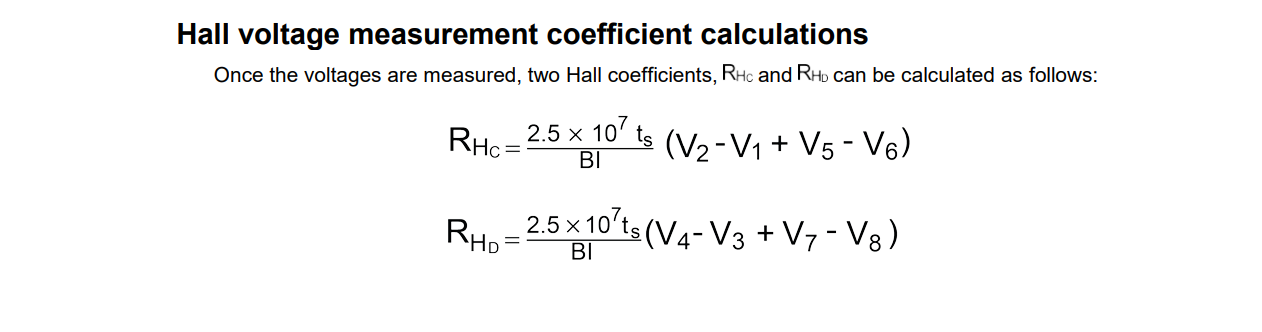
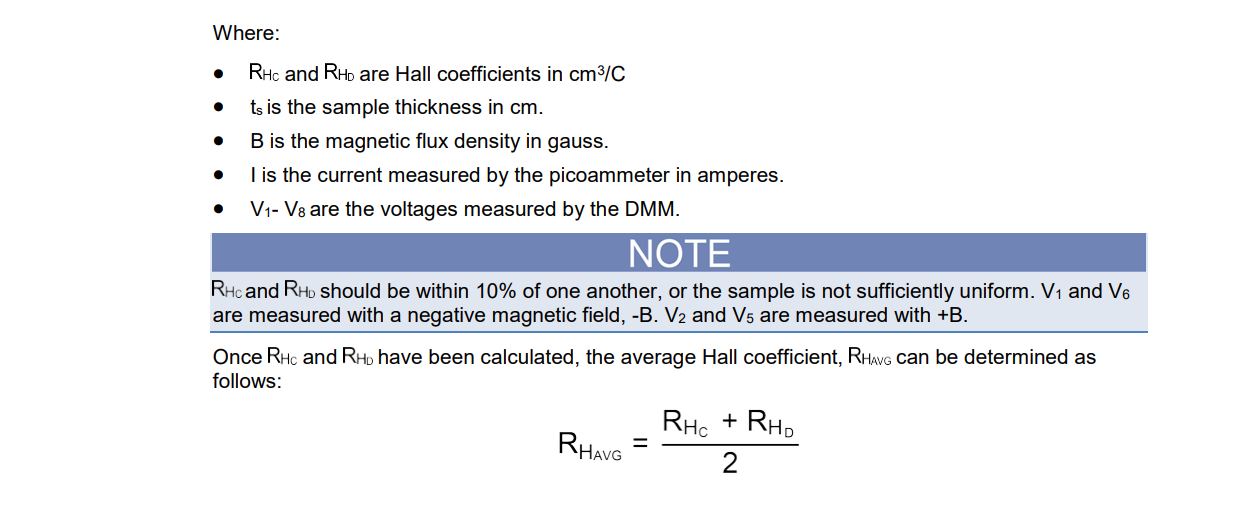

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [56]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

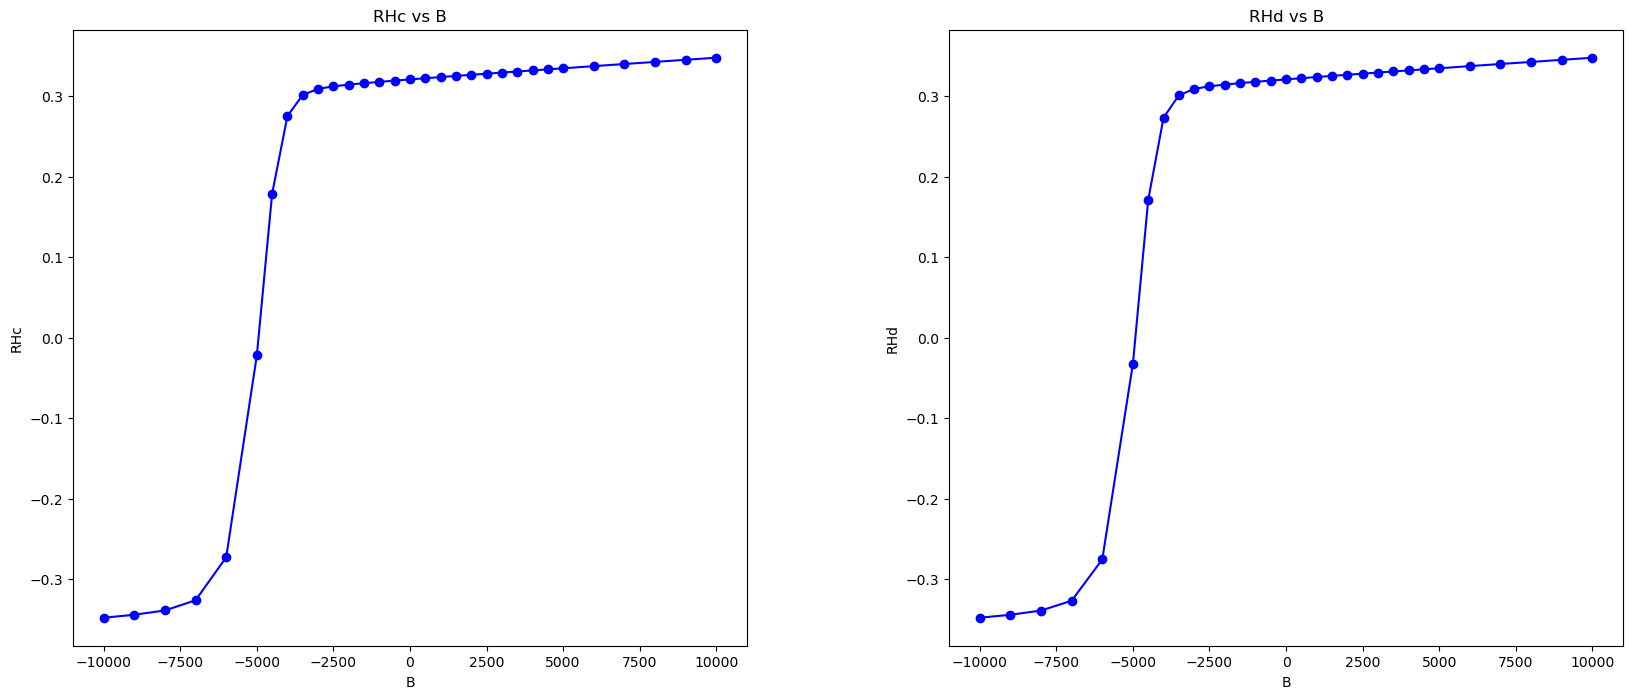

In [57]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

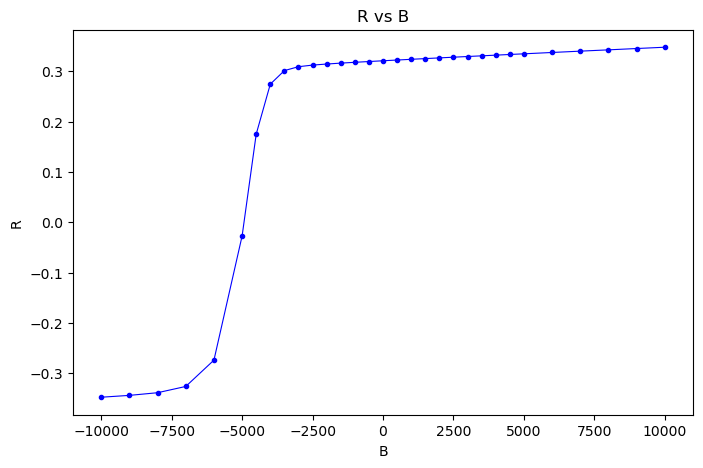

In [58]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [59]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,50.000098,327.116397,-327.104600,-153.218400,153.261276,153.107685,-153.110264,-327.106925,327.162127,1000000
1,0.001,-9000,50.000410,327.443159,-327.439141,-154.818423,154.875113,154.709596,-154.711619,-327.419915,327.441751,1000000
2,0.001,-8000,49.999793,327.729795,-327.726251,-156.444900,156.486155,156.324523,-156.340238,-327.725752,327.766401,1000000
3,0.001,-7000,50.000283,328.041294,-328.029528,-158.050007,158.073897,157.941410,-157.942072,-328.038000,328.089662,1000000
4,0.001,-6000,50.000147,328.344936,-328.346499,-159.684181,159.714215,159.576543,-159.560532,-328.354769,328.387166,1000000


### Hall resistance calculation

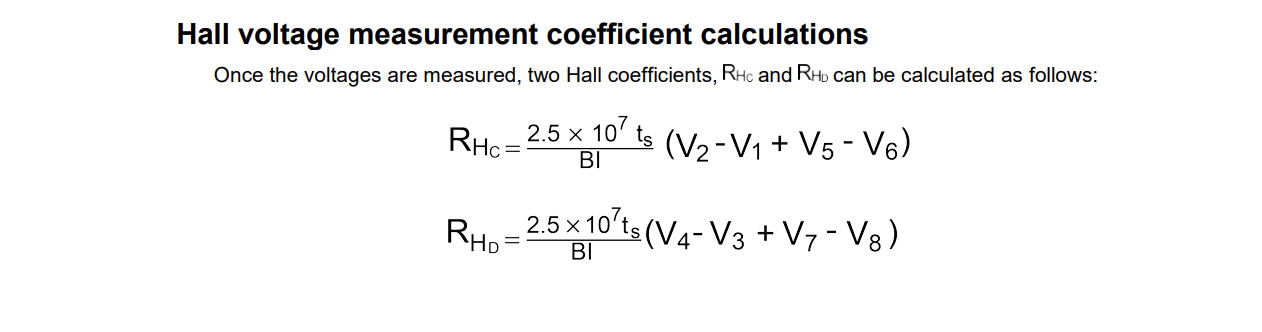

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [60]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

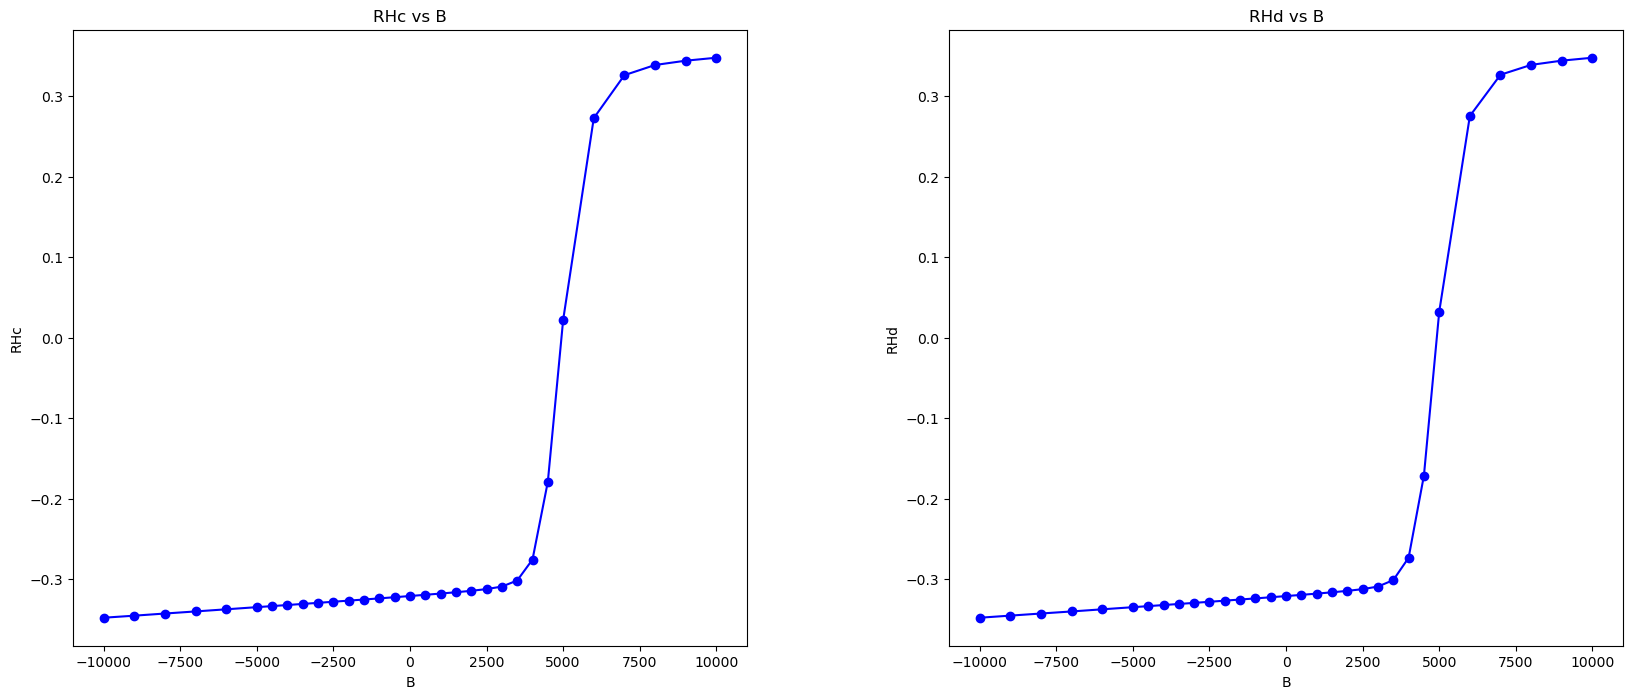

In [61]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

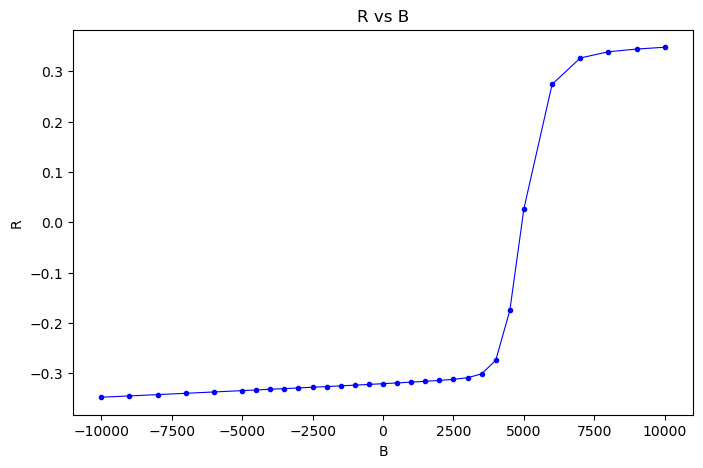

In [62]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

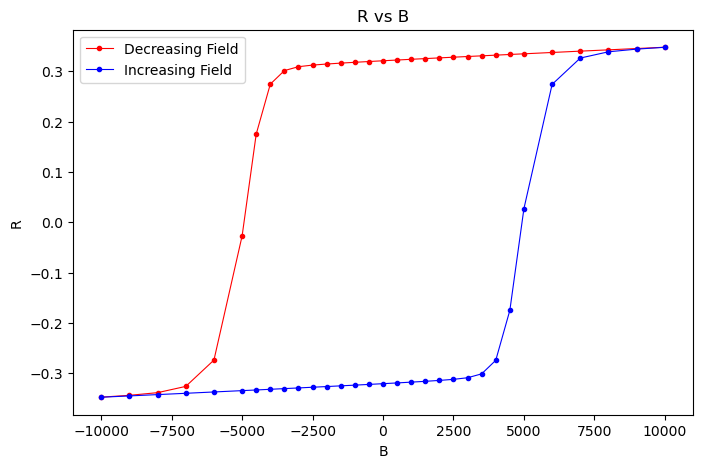

In [63]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()